In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Railway_info.csv')
df.head()

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,Friday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,Friday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,Wednesday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday


In [4]:
df.describe()

,Train_No
count,11113.000000
mean,49190.570413
std,28515.986645
min,107.000000
25%,22607.000000
50%,47174.000000
75%,68012.000000
max,99908.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Train_No                  11113 non-null  int64 
 1   Train_Name                11113 non-null  object
 2   Source_Station_Name       11113 non-null  object
 3   Destination_Station_Name  11113 non-null  object
 4   days                      11113 non-null  object
dtypes: int64(1), object(4)
memory usage: 434.2+ KB


In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

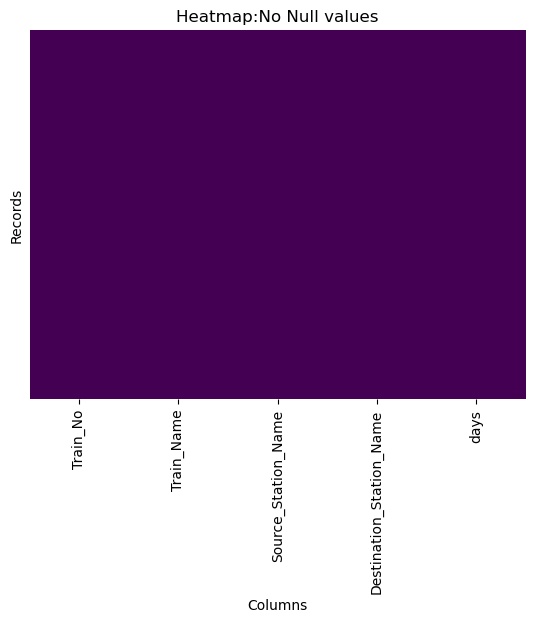

In [11]:
sns.heatmap(df.isnull(),cbar= False, cmap='viridis', yticklabels=False)
plt.title('Heatmap:No Null values')
plt.xlabel('Columns')
plt.ylabel('Records')
plt.show()

In [12]:
#Checking if there are any empty spaces

for col in ['Train_Name','Source_Station_Name','Destination_Station_Name','days']:
    empty_spaces = df[df[col].str.strip()=='']==1
print(empty_spaces.count())

Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64


In [13]:
df.nunique() #gives all the unique values count in each coulmn

Train_No                    11113
Train_Name                   7580
Source_Station_Name           921
Destination_Station_Name      924
days                           14
dtype: int64

In [14]:
# Finding most common stations

for col in ['Source_Station_Name','Destination_Station_Name']:
    print(df[col].value_counts().head())

Source_Station_Name
CST-MUMBAI       513
SEALDAH          372
CHENNAI BEACH    339
HOWRAH JN.       338
KALYAN JN        285
Name: count, dtype: int64
Destination_Station_Name
CST-MUMBAI       514
SEALDAH          373
CHENNAI BEACH    342
HOWRAH JN.       337
KALYAN JN        284
Name: count, dtype: int64


In [15]:
df.days.unique()

array(['Saturday', 'Friday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday',
       'Thursday', 'Mondayd', 'Thursdayd', 'Tuesdayd', 'Fridayd',
       'Wednesdayd', 'Saturdayd', 'Sundayd'], dtype=object)

In [16]:
#replacing days with correct day_name

df['days'] = df['days'].replace(r'd$','',regex=True) 
df['days'].unique()

array(['Saturday', 'Friday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday',
       'Thursday'], dtype=object)

In [17]:
df.nunique()

Train_No                    11113
Train_Name                   7580
Source_Station_Name           921
Destination_Station_Name      924
days                            7
dtype: int64

In [18]:
#Standardizing all station names into uppercase

for col in ['Source_Station_Name','Destination_Station_Name']:
    df[col].str.upper()
    print(df[col])

0          SAWANTWADI ROAD
1              MADGOAN JN.
2              MADGOAN JN.
3        DELHI-SAFDAR JANG
4               AURANGABAD
               ...        
11108             PUNE JN.
11109             TALEGAON
11110             PUNE JN.
11111             TALEGAON
11112             PUNE JN.
Name: Source_Station_Name, Length: 11113, dtype: object
0                               MADGOAN JN.
1                           SAWANTWADI ROAD
2        CHHATRAPATI SHAHU MAHARAJ TERMINUS
3                         DELHI-SAFDAR JANG
4                              VARANASI JN.
                        ...                
11108                              TALEGAON
11109                          SHIVAJINAGAR
11110                              TALEGAON
11111                              PUNE JN.
11112                              TALEGAON
Name: Destination_Station_Name, Length: 11113, dtype: object


In [20]:
All_stations = pd.concat([df['Source_Station_Name'],df['Destination_Station_Name']])
unique_stations = All_stations.drop_duplicates()
print(unique_stations.sort_values())

7512      ABHANPUR JN.
6435            ABOHAR
9321          ABU ROAD
6672      ACHHNERA JN.
205           ADILABAD
             ...      
9251         WARASEONI
5653        WARDHA JN.
151        WHITE FIELD
7633     YAMUNA BRIDGE
141     YESVANTPUR JN.
Length: 933, dtype: object


In [30]:
#Extracting train details for Monday and tuesday

df.loc[df['days'].str.contains('Monday|Tuesday')]

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
5,421,LKO-SVDK FTR,LUCKNOW JN.,SHRI MATA VAISHNO DEVI KATRA,Tuesday
6,422,SVDK-LKO FTR,SHRI MATA VAISHNO DEVI KATRA,LUCKNOW JN.,Monday
8,502,RJPB-UMB FTR,RAJENDRANAGAR TERMINAL,AMBALA CANTT JN,Monday
15,1037,LTT-SWV SPL,LOKMANYA TILAK TERMINUS,SAWANTWADI ROAD,Tuesday
16,1038,SWV-LTT SPL,SAWANTWADI ROAD,LOKMANYA TILAK TERMINUS,Tuesday
...,...,...,...,...,...
11099,99831,LNL-PUNE EMU,LONAVLA,PUNE JN.,Tuesday
11103,99835,LNL-PUNE EMU,LONAVLA,PUNE JN.,Tuesday
11105,99901,TGN-PUNE EMU,TALEGAON,PUNE JN.,Tuesday
11108,99904,PUNE-TGN EMU,PUNE JN.,TALEGAON,Tuesday


In [32]:
#Extracting train details with source station "Wardha Junction"

df.loc[df['Source_Station_Name']=='WARDHA JN.']

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
5653,51195,WR-BPQ PASS,WARDHA JN.,BALHARSHAH,Wednesday
5656,51198,WR-BSL PASSE,WARDHA JN.,BHUSAVAL JN.,Sunday
5663,51259,WR-NGP PASSE,WARDHA JN.,NAGPUR JN.(CR),Tuesday
5666,51262,WR- AMI PASS,WARDHA JN.,AMRAVATI,Friday


In [34]:
trains_count = df['Train_Name'].drop_duplicates().count()
trains_count

7580

In [36]:
trains = df['Train_Name'].unique()
trains

array(['SWV-MAO-VLNK', 'VLNK-MAO-SWV', 'MAO-KOP SPEC', ...,
       'PUNE-TGN EMU', 'TGN-PUNE EMU', 'EMU'], dtype=object)

In [38]:
# Extracting number of trains from each station
station_trains = df.groupby(['Source_Station_Name'])['Train_No'].count().reset_index()
station_trains = station_trains.rename(columns={'Train_No':'No_of_trains'})
station_trains

,Source_Station_Name,No_of_trains
0,ABHANPUR JN.,2
1,ABOHAR,1
2,ABU ROAD,1
3,ACHHNERA JN.,1
4,ADILABAD,5
...,...,...
916,WARASEONI,1
917,WARDHA JN.,4
918,WHITE FIELD,2
919,YAMUNA BRIDGE,2


In [40]:
#Calculating average number of trains per day per station
# Count the number of trains per station per day
trains_per_day = df.groupby(['Source_Station_Name', 'days'])['Train_No'].count().reset_index()

# Find the most frequent daily train count per station
avg_trains_per_day = trains_per_day.groupby(['Source_Station_Name','days'])['Train_No'].max().reset_index()

# Rename column
avg_trains_per_day = avg_trains_per_day.rename(columns={'Train_No':'Avg_Train_count'})
avg_trains_per_day


,Source_Station_Name,days,Avg_Train_count
0,ABHANPUR JN.,Saturday,1
1,ABHANPUR JN.,Tuesday,1
2,ABOHAR,Wednesday,1
3,ABU ROAD,Tuesday,1
4,ACHHNERA JN.,Saturday,1
...,...,...,...
3380,YESVANTPUR JN.,Saturday,8
3381,YESVANTPUR JN.,Sunday,6
3382,YESVANTPUR JN.,Thursday,10
3383,YESVANTPUR JN.,Tuesday,9


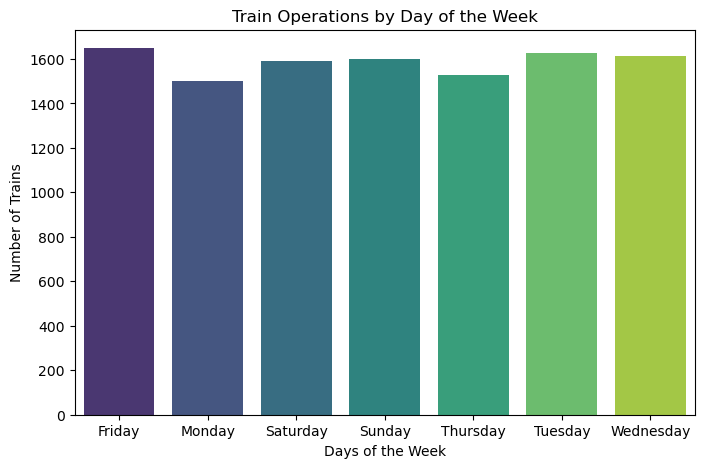

In [42]:
# Count the number of trains per day
train_counts = df['days'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=train_counts.index, y=train_counts.values, palette="viridis")
plt.xlabel("Days of the Week")
plt.ylabel("Number of Trains")
plt.title("Train Operations by Day of the Week")
plt.show()

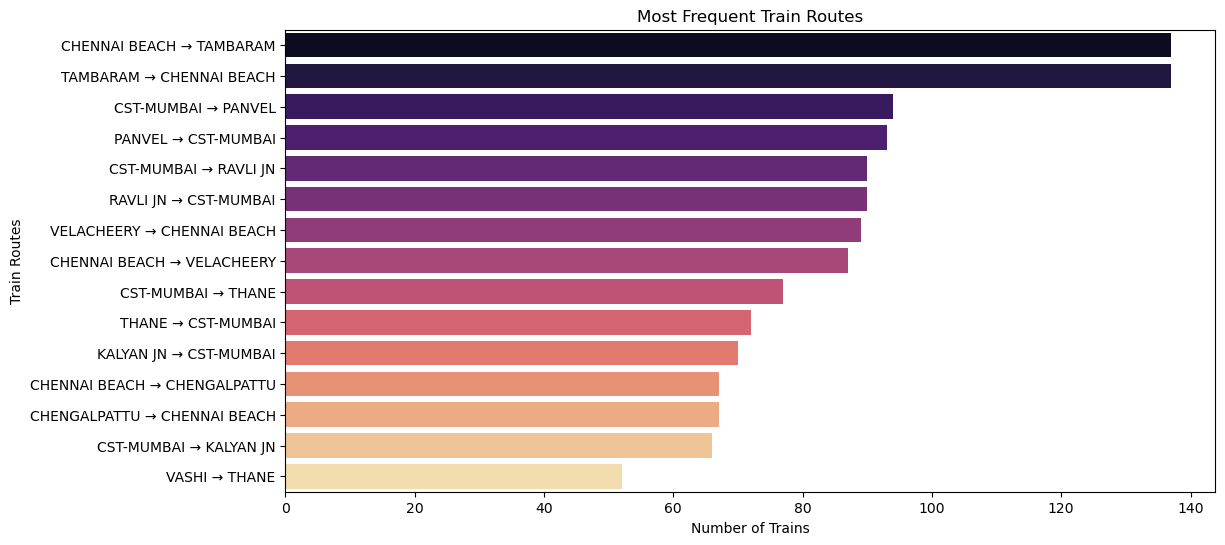

In [44]:
df['Route'] = df['Source_Station_Name'] + " → " + df['Destination_Station_Name']
top_routes = df['Route'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=top_routes.index, x=top_routes.values, palette="magma")
plt.xlabel("Number of Trains")
plt.ylabel("Train Routes")
plt.title("Most Frequent Train Routes")
plt.show()


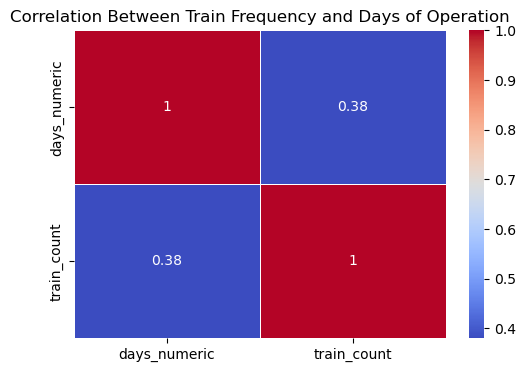

              days_numeric  train_count
days_numeric      1.000000     0.380576
train_count       0.380576     1.000000


In [45]:
# Map weekdays to numerical values
days_mapping = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}
df["days_numeric"] = df["days"].map(days_mapping)

# Count the number of trains per day
train_count_per_day = df.groupby("days_numeric")["Train_No"].count().reset_index()
train_count_per_day.columns = ["days_numeric", "train_count"]

# Compute correlation
correlation_matrix = train_count_per_day.corr()

# Display correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Train Frequency and Days of Operation")
plt.show()

# Print correlation values
print(correlation_matrix)